In [0]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import keras
from keras.layers import Conv2D, Dense, MaxPooling1D, BatchNormalization, Flatten, Dropout, Activation
from keras.models import Sequential
from keras.utils import to_categorical
from keras import backend as K
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping

In [0]:
df = pd.read_csv('../dataset/train.csv')
df_test = pd.read_csv('../dataset/test.csv')

In [177]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [178]:
Y_train = df['label']
X_train = df.drop(labels=['label'],axis=1)
Y_train.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [179]:
#Check null values in the labels
Y_train.isnull().values.any()

False

In [180]:
#Check null values in the pixel data
X_train.isnull().values.any()

False

In [0]:
#Normalise the data
X_train = X_train/255
df_test = df_test/255

In [0]:
#Convert pixel data to 28x28 image
X_train_reshape = X_train.values.reshape(-1,28,28,1)
df_test = df_test.values.reshape(-1,28,28,1)

In [183]:
print(np.shape(X_train_reshape))
print(np.shape(df_test))

(42000, 28, 28, 1)
(28000, 28, 28, 1)


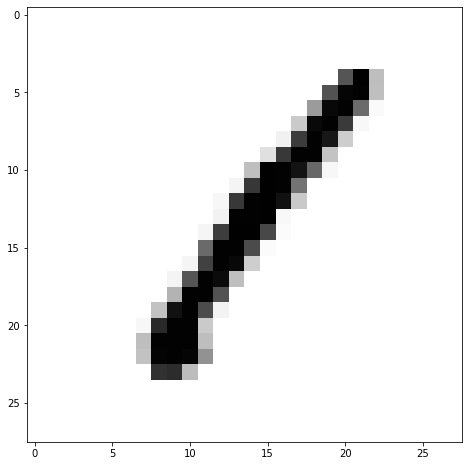

In [137]:
plt.imshow(X_train_reshape[0], cmap='Greys', interpolation=None)
plt.show()

In [0]:
#Convert categorical data to one hot encoding using keras
Y_train = to_categorical(Y_train, num_classes=10)

In [185]:
print(Y_train[0])

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [0]:
#Create validation dataset from the training data
X_train, X_test, Y_train, Y_test = train_test_split(X_train_reshape, Y_train, test_size=0.1, random_state=42)

In [187]:
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

X_train shape: (34020, 28, 28, 1)
X_val shape: (3780, 28, 28, 1)
X_test shape: (4200, 28, 28, 1)


In [188]:
print('Y_train shape:', Y_train.shape)
print('Y_test shape:', Y_val.shape)

Y_train shape: (34020, 10)
Y_val shape: (3780, 10)
Y_test shape: (3780, 10)


In [0]:
#CNN Model
model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [0]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [194]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 24, 24, 128)       73856     
_________________________________________________________________
flatten_5 (Flatten)          (None, 73728)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                737290    
Total params: 811,786
Trainable params: 811,786
Non-trainable params: 0
_________________________________________________________________


In [0]:
#from keras.callbacks import ModelCheckpoint, EarlyStopping
#callbacks = [ModelCheckpoint('/content/drive/My Drive/Colab Notebooks/digit-recognizer/best.h5', monitor='val_loss', verbose=1),
#            EarlyStopping(patience=3, monitor='val_loss', verbose=1)]

In [195]:
#history = model.fit(X_train, Y_train, epochs=10, validation_split=0.1, callbacks=callbacks)
model.fit(X_train, Y_train, epochs=5, validation_split=0.1)

Train on 34020 samples, validate on 3780 samples
Epoch 1/5





34020/34020 [==============================] - 219s 6ms/step - loss: 0.1401 - acc: 0.9579 - val_loss: 0.0643 - val_acc: 0.9794
Epoch 2/5
34020/34020 [==============================] - 219s 6ms/step - loss: 0.0472 - acc: 0.9854 - val_loss: 0.0544 - val_acc: 0.9833
Epoch 3/5
34020/34020 [==============================] - 218s 6ms/step - loss: 0.0285 - acc: 0.9903 - val_loss: 0.0502 - val_acc: 0.9870
Epoch 4/5
34020/34020 [==============================] - 218s 6ms/step - loss: 0.0164 - acc: 0.9947 - val_loss: 0.0639 - val_acc: 0.9844
Epoch 5/5
34020/34020 [==============================] - 218s 6ms/step - loss: 0.0140 - acc: 0.9953 - val_loss: 0.0553 - val_acc: 0.9865


In [0]:
# predict results
results = model.predict(X_test)
# select the index with maximum probability
results = np.argmax(results,axis = 1)

In [203]:
# evaluate the final model
_, train_acc = model.evaluate(X_train, Y_train, verbose=0)
_, test_acc = model.evaluate(X_test, Y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.997, Test: 0.981
